In [1]:
import string
import random
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
import pandas as pd
pd.read_json("clickbait17-train-170331/instances.jsonl", lines=True)

,id,postTimestamp,postText,postMedia,targetTitle,targetDescription,targetKeywords,targetParagraphs,targetCaptions
0,608310377143799808,Tue Jun 09 16:31:10 +0000 2015,[Apple's iOS 9 'App thinning' feature will giv...,[],Apple gives back gigabytes: iOS 9 'app thinnin...,'App thinning' will be supported on Apple's iO...,"Apple,gives,gigabytes,iOS,9,app,thinning,featu...",[Paying for a 64GB phone only to discover that...,['App thinning' will be supported on Apple's i...
1,609297109095972864,Fri Jun 12 09:52:05 +0000 2015,[RT @kenbrown12: Emerging market investors are...,[media/609297109095972864.jpg],Emerging Markets Suffer Largest Outflow in Sev...,Global investors have yanked $9.3 billion from...,"emerging market,emerging markets,em flows,em i...","[Emerging markets are out of favor., Global in...","[Stocks Fall as Investors Watch Central Banks,..."
2,609504474621612032,Fri Jun 12 23:36:05 +0000 2015,[U.S. Soccer should start answering tough ques...,[],U.S. Soccer should start answering tough quest...,A U.S. Senator's scathing letter questioned U....,,"[WINNIPEG, Manitoba – The bubble U.S. Soccer i...",[US to vote for Ali in FIFA election and not B...
3,609748367049105408,Sat Jun 13 15:45:13 +0000 2015,[How theme parks like Disney World left the mi...,[],How theme parks like Disney World left the mid...,"America's top family vacation spots, like the ...","disney, disney world, disney ticket prices, di...",[When Walt Disney World opened in an Orlando s...,"[Some 1,000 persons turned out in Albuquerque,..."
4,608688782821453824,Wed Jun 10 17:34:49 +0000 2015,[Could light bulbs hurt your health? One compa...,[media/608688782821453825.jpg],Warning labels on your light bulbs,One company will put a health notice on all th...,"health, Should there be warning labels on your...",[(CNN)The light bulb always makes the world's ...,[Electric lights have made the world safer and...
...,...,...,...,...,...,...,...,...,...
2454,609056814819323904,Thu Jun 11 17:57:15 +0000 2015,[Man who received world's first penis transpla...,[],World's first penis transplant patient is set ...,"Surgeons at Stellenbosch University, who carri...","World,s,penis,transplant,patient,set,FATHER,an...",[The man who underwent the world's first succe...,[Six months after undergoing the world's first...
2455,610125815116865536,Sun Jun 14 16:45:04 +0000 2015,"[RT @NYTSports: Abby didn't start, team couldn...",[media/610125815116865536.jpg],"At Women’s World Cup, Tie Leaves U.S. on Solid...",With Abby Wambach not starting for the first t...,"Soccer,Wambach Abby,Press Christen,United St...","[WINNIPEG, Manitoba, The moment Abby Wambach s...","[The New York Times, Basic, All Access, Home D..."
2456,608338587495628800,Tue Jun 09 18:23:16 +0000 2015,[Obama defends Affordable Care Act ahead of Su...,[media/608338587495628801.jpg],Obama Defends Health Law Ahead of Supreme Cour...,President Obama talks at the G7 summit in Germ...,,[With the Supreme Court set to issue a ruling ...,[]
2457,609684420082180096,Sat Jun 13 11:31:07 +0000 2015,[New study of the Deflategate report concludes...,[],Deflating ‘Deflategate’,A new study weakens the case against the Patri...,"Football,Cheating,American Enterprise Institut...","[BEFORE “Deflategate,” the National Football L...","[The New York Times, Basic, All Access, Home D..."


In [3]:
#Send into rnn description, title, and keywords


In [4]:
def num_words_in_li(li_el):
    s = 0
    for l in li_el:
        s += len(l)
        
    return s

pd.read_json("clickbait17-train-170331/instances.jsonl", lines=True)["targetParagraphs"].apply(num_words_in_li)

0        4081
1         430
2        4082
3       10660
4        5734
        ...  
2454     5421
2455     5564
2456     6398
2457     5088
2458     4491
Name: targetParagraphs, Length: 2459, dtype: int64

In [5]:
def lower_string(s):
    return s.lower()

df = pd.read_json("clickbait17-train-170331/instances.jsonl", lines=True)
df["label"] = pd.read_json("clickbait17-train-170331/truth.jsonl", lines=True)["truthClass"]

df["targetKeywords"] = df["targetKeywords"].str.lower().str.replace('[^\w\s]','').str.split('[ ,]')
df = df.explode("targetKeywords")
df["count"] = [1]*df.shape[0]

clickbait_g_df = df[df["label"] == "clickbait"].groupby('targetKeywords').sum()
clickbait_g_df = clickbait_g_df.sort_values(by=["count"], ascending=False).reset_index()

no_clickbait_g_df = df[df["label"] == "no-clickbait"].groupby('targetKeywords').sum()
no_clickbait_g_df = no_clickbait_g_df.sort_values(by=["count"], ascending=False).reset_index()

g_df = df.groupby('targetKeywords').sum()
g_df = g_df.sort_values(by=["count"], ascending=False).reset_index()

In [6]:
g_df[0:21]

,targetKeywords,id,count
0,,8.282836e+20,1360.0
1,news,3.805972e+20,625.0
2,and,1.790912e+20,294.0
3,uncategorized,8.705547e+19,143.0
4,breaking,7.672175e+19,126.0
5,nba,7.307035e+19,120.0
6,us,7.063120e+19,116.0
7,of,6.759866e+19,111.0
8,world,5.666507e+19,93.0
9,the,5.663660e+19,93.0


In [7]:
keyword_to_count = dict(zip(g_df["targetKeywords"], g_df["count"]))
keyword_to_count

cb_keyword_to_count = dict(zip(clickbait_g_df["targetKeywords"], clickbait_g_df["count"]))
no_cb_keyword_to_count = dict(zip(no_clickbait_g_df["targetKeywords"], no_clickbait_g_df["count"]))
cb_keyword_to_count

{'': 415.0,
 'news': 116.0,
 'and': 88.0,
 'uncategorized': 62.0,
 'of': 36.0,
 'new': 36.0,
 'the': 35.0,
 'in': 29.0,
 'world': 24.0,
 'nba': 24.0,
 'health': 23.0,
 'to': 22.0,
 'black': 21.0,
 'watercooler': 21.0,
 'is': 21.0,
 'breaking': 20.0,
 'business': 19.0,
 'us': 16.0,
 'tech': 16.0,
 '2016': 15.0,
 'for': 15.0,
 'york': 15.0,
 'apple': 15.0,
 'cnncom': 14.0,
 'best': 14.0,
 'state': 13.0,
 'videos': 13.0,
 'italian': 13.0,
 'tony': 13.0,
 'tv': 12.0,
 'food': 12.0,
 'post': 12.0,
 'national': 12.0,
 'orange': 12.0,
 'rights': 12.0,
 'lifestyle': 12.0,
 'video': 11.0,
 'politics': 11.0,
 'season': 11.0,
 'music': 11.0,
 'entertainment': 11.0,
 'cat': 10.0,
 'sat': 10.0,
 'uk': 10.0,
 'with': 10.0,
 'dellavedova': 9.0,
 'local': 9.0,
 'frappuccino': 9.0,
 'blair': 9.0,
 'advice': 9.0,
 'newspoliticalgeneral': 9.0,
 'on': 9.0,
 'a': 9.0,
 'alien': 9.0,
 'google': 8.0,
 'fish': 8.0,
 'devdesign': 8.0,
 'usworld': 8.0,
 'david': 8.0,
 'europe': 8.0,
 'be': 8.0,
 'grande': 7.0,


In [8]:
keyword_to_popularity = dict(zip(g_df["targetKeywords"], g_df.index))
keyword_to_popularity

{'': 0,
 'news': 1,
 'and': 2,
 'uncategorized': 3,
 'breaking': 4,
 'nba': 5,
 'us': 6,
 'of': 7,
 'world': 8,
 'the': 9,
 'new': 10,
 'cnncom': 11,
 'national': 12,
 'in': 13,
 'state': 14,
 'york': 15,
 'health': 16,
 'local': 17,
 'politics': 18,
 'police': 19,
 'newsnews': 20,
 'business': 21,
 'prison': 22,
 'football': 23,
 'entertainment': 24,
 'watercooler': 25,
 'to': 26,
 'james': 27,
 'tech': 28,
 'sports': 29,
 'lebron': 30,
 'video': 31,
 'uk': 32,
 'trending': 33,
 'nfl': 34,
 'finals': 35,
 'is': 36,
 'on': 37,
 'cleveland': 38,
 'apple': 39,
 '2016': 40,
 'david': 41,
 'black': 42,
 'election': 43,
 'political': 44,
 'for': 45,
 'usworld': 46,
 'international': 47,
 'music': 48,
 'basketball': 49,
 'tv': 50,
 'rights': 51,
 'texas': 52,
 'clinton': 53,
 'college': 54,
 'cavaliers': 55,
 'a': 56,
 'dallas': 57,
 'appssoftware': 58,
 'lifestyle': 59,
 'europe': 60,
 '2015': 61,
 'cnn': 62,
 'city': 63,
 'warriors': 64,
 'obama': 65,
 'post': 66,
 'island': 67,
 'videos':

In [9]:
df = pd.read_json("clickbait17-train-170331/instances.jsonl", lines=True)
df["targetKeywords"] = df["targetKeywords"].str.lower().str.replace('[^\w\s]','').str.split('[ ,]')
df = df.explode("targetKeywords")

def count_words(word):
    return keyword_to_count[word]

def cb_count_words(word):
    try:
        return cb_keyword_to_count[word]
    except Exception as e:
        return 0

def no_cb_count_words(word):
    try:
        return no_cb_keyword_to_count[word]
    except Exception as e:
        return 0

def popularity_of_words(word):
    return keyword_to_popularity[word]

main_df = pd.read_json("clickbait17-train-170331/instances.jsonl", lines=True)
main_df["average_count"] = df["targetKeywords"].apply(count_words).reset_index().groupby(by=["index"]).mean()

main_df["cb_average_count"] = df["targetKeywords"].apply(cb_count_words).reset_index().groupby(by=["index"]).mean()
main_df["no_cb_average_count"] = df["targetKeywords"].apply(no_cb_count_words).reset_index().groupby(by=["index"]).mean()


main_df["max_count"] = df["targetKeywords"].apply(count_words).reset_index().groupby(by=["index"]).max()
main_df["avgrage_popularity"] = df["targetKeywords"].apply(popularity_of_words).reset_index().groupby(by=["index"]).mean()
main_df["max_popularity"] = df["targetKeywords"].apply(popularity_of_words).reset_index().groupby(by=["index"]).max()

main_df["targetKeywords"] = main_df["targetKeywords"].str.lower().str.replace(' ', '').str.split('[,]')

main_df["min_popularity"] = df["targetKeywords"].apply(popularity_of_words).reset_index().groupby(by=["index"]).min()
main_df["min_count"] = df["targetKeywords"].apply(count_words).reset_index().groupby(by=["index"]).min()
df = pd.read_json("clickbait17-train-170331/truth.jsonl", lines=True)
main_df.head()

,id,postTimestamp,postText,postMedia,targetTitle,targetDescription,targetKeywords,targetParagraphs,targetCaptions,average_count,cb_average_count,no_cb_average_count,max_count,avgrage_popularity,max_popularity,min_popularity,min_count
0,608310377143799808,Tue Jun 09 16:31:10 +0000 2015,[Apple's iOS 9 'App thinning' feature will giv...,[],Apple gives back gigabytes: iOS 9 'app thinnin...,'App thinning' will be supported on Apple's iO...,"[apple, gives, gigabytes, ios, 9, app, thinnin...",[Paying for a 64GB phone only to discover that...,['App thinning' will be supported on Apple's i...,1.000000,0.000000,1.000000,1.0,4328.000000,4328,4328,1.0
1,609297109095972864,Fri Jun 12 09:52:05 +0000 2015,[RT @kenbrown12: Emerging market investors are...,[media/609297109095972864.jpg],Emerging Markets Suffer Largest Outflow in Sev...,Global investors have yanked $9.3 billion from...,"[emergingmarket, emergingmarkets, emflows, emi...","[Emerging markets are out of favor., Global in...","[Stocks Fall as Investors Watch Central Banks,...",64.700000,12.000000,52.700000,625.0,2998.800000,5920,1,1.0
2,609504474621612032,Fri Jun 12 23:36:05 +0000 2015,[U.S. Soccer should start answering tough ques...,[],U.S. Soccer should start answering tough quest...,A U.S. Senator's scathing letter questioned U....,[],"[WINNIPEG, Manitoba – The bubble U.S. Soccer i...",[US to vote for Ali in FIFA election and not B...,1360.000000,415.000000,945.000000,1360.0,0.000000,0,0,1360.0
3,609748367049105408,Sat Jun 13 15:45:13 +0000 2015,[How theme parks like Disney World left the mi...,[],How theme parks like Disney World left the mid...,"America's top family vacation spots, like the ...","[disney, disneyworld, disneyticketprices, disn...",[When Walt Disney World opened in an Orlando s...,"[Some 1,000 persons turned out in Albuquerque,...",99.052632,30.578947,68.473684,1360.0,290.157895,1183,0,2.0
4,608688782821453824,Wed Jun 10 17:34:49 +0000 2015,[Could light bulbs hurt your health? One compa...,[media/608688782821453825.jpg],Warning labels on your light bulbs,One company will put a health notice on all th...,"[health, shouldtherebewarninglabelsonyourlight...",[(CNN)The light bulb always makes the world's ...,[Electric lights have made the world safer and...,223.461538,68.769231,154.692308,1360.0,1043.307692,4492,0,1.0


In [10]:
main_df.iloc[0]

id                                                    608310377143799808
postTimestamp                             Tue Jun 09 16:31:10 +0000 2015
postText               [Apple's iOS 9 'App thinning' feature will giv...
postMedia                                                             []
targetTitle            Apple gives back gigabytes: iOS 9 'app thinnin...
targetDescription      'App thinning' will be supported on Apple's iO...
targetKeywords         [apple, gives, gigabytes, ios, 9, app, thinnin...
targetParagraphs       [Paying for a 64GB phone only to discover that...
targetCaptions         ['App thinning' will be supported on Apple's i...
average_count                                                          1
cb_average_count                                                       0
no_cb_average_count                                                    1
max_count                                                              1
avgrage_popularity                                 

In [11]:
vocab = set(main_df["targetKeywords"].explode().values)
word_to_ix = {word: i for i, word in enumerate(vocab)}
word_to_ix

{'': 0,
 'gives': 1,
 'trademark': 2,
 'doreenluckie': 3,
 'mudhentavern': 4,
 'economicnews': 5,
 "u.s.women'ssoccerteam:extrovertsenterworldcup-cnn.com": 6,
 'how-to-cut-fruit': 7,
 'goldman%20sachs%20group': 8,
 'highwaytrustfund': 9,
 'priests': 10,
 'electriclightandpower': 11,
 'experts': 12,
 'chicagoblackhawks': 13,
 'worldoceansday': 14,
 'defensedepartment': 15,
 'patients': 16,
 'quarantines': 17,
 "mother'sdaykidnote": 18,
 'rosie': 19,
 'finals': 20,
 'jurassicworldrealistic': 21,
 'kyliejennertyga': 22,
 'workplaceadvicecolumn': 23,
 'alienation': 24,
 'circles': 25,
 'jessiej': 26,
 'generallaborissues': 27,
 'placenta': 28,
 'ediefalco': 29,
 'unearth': 30,
 '533228.by': 31,
 'teennewplanet': 32,
 'wunderman': 33,
 'columbiauniversity': 34,
 'deer': 35,
 'beverlyhills': 36,
 'whitlockjason': 37,
 'ftfsectionexperts': 38,
 'dennishastertpleadsnotguiltyonallcounts-cnnpolitics.com': 39,
 'mickinneytexas': 40,
 'janner': 41,
 'eggfarminvestigation': 42,
 'dskacquitted': 43,

In [12]:
context_idxs = torch.tensor([word_to_ix[w] for w in main_df.iloc[0]["targetKeywords"]], dtype=torch.long)
context_idxs

tensor([3609,    1, 5323, 5553, 1193, 5827, 3205, 1118, 2783, 4110, 5426, 1592,
        4375])

In [13]:
df = pd.read_json("clickbait17-train-170331/truth.jsonl", lines=True)
main_df["label"] = df["truthClass"]
cb_df = main_df[main_df["label"] == "clickbait"].reset_index()
not_cb_df = main_df[main_df["label"] != "clickbait"].reset_index()

cb_df["normalized_min_count"] = (cb_df["min_count"]-cb_df["min_count"].mean())/cb_df["min_count"].std()
not_cb_df["normalized_min_count"] = (not_cb_df["min_count"]-not_cb_df["min_count"].mean())/not_cb_df["min_count"].std()
cb_df["normalized_avg_count"] = (cb_df["average_count"]-cb_df["average_count"].mean())/cb_df["average_count"].std()
not_cb_df["normalized_avg_count"] = (not_cb_df["average_count"]-not_cb_df["average_count"].mean())/not_cb_df["average_count"].std()

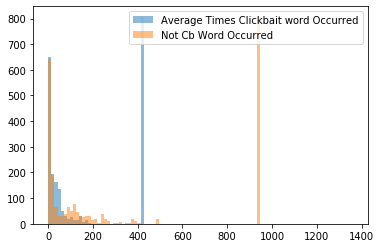

In [14]:
import numpy
import matplotlib.pyplot as py

bins = numpy.linspace(1, g_df["count"].max(), 100)

py.hist(main_df["cb_average_count"], bins, alpha=0.5, label='Average Times Clickbait word Occurred')
py.hist(main_df["no_cb_average_count"], bins, alpha=0.5, label='Not Cb Word Occurred')
py.legend(loc='upper right')
py.show()

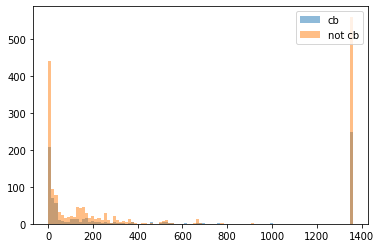

In [15]:
#The most common words were probably in both clickbait and non-clickbait
#Maybe min_count would be best????

import numpy
import matplotlib.pyplot as py

bins = numpy.linspace(1, g_df["count"].max(), 100)

py.hist(cb_df["average_count"], bins, alpha=0.5, label='cb')
py.hist(not_cb_df["average_count"], bins, alpha=0.5, label='not cb')
py.legend(loc='upper right')
py.show()

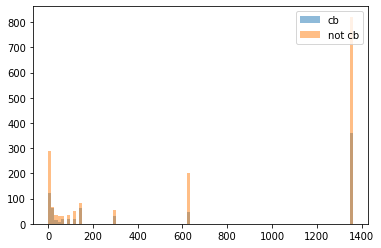

In [16]:
import numpy
import matplotlib.pyplot as py

bins = numpy.linspace(1, g_df["count"].max(), 100)

py.hist(cb_df["max_count"], bins, alpha=0.5, label='cb')
py.hist(not_cb_df["max_count"], bins, alpha=0.5, label='not cb')
py.legend(loc='upper right')
py.show()

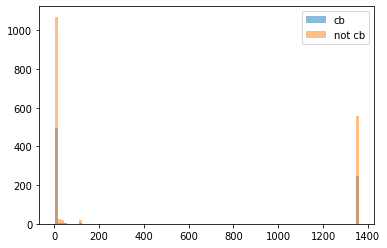

In [17]:
import numpy
import matplotlib.pyplot as py

bins = numpy.linspace(1, g_df["count"].max(), 100)

py.hist(cb_df["min_count"], bins, alpha=0.5, label='cb')
py.hist(not_cb_df["min_count"], bins, alpha=0.5, label='not cb')
py.legend(loc='upper right')
py.show()

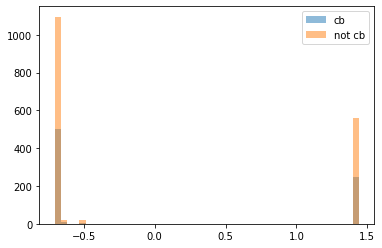

In [18]:
#Hopefully see the outliers making different distribution
import numpy
import matplotlib.pyplot as py

bins = numpy.linspace(min(not_cb_df["normalized_min_count"].min(), cb_df["normalized_min_count"].min()), max(not_cb_df["normalized_min_count"].max(), cb_df["normalized_min_count"].max()), 50)

py.hist(cb_df["normalized_min_count"], bins, alpha=0.5, label='cb')
py.hist(not_cb_df["normalized_min_count"], bins, alpha=0.5, label='not cb')
py.legend(loc='upper right')
py.show()

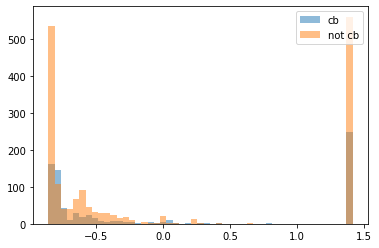

In [19]:
#Hopefully see the outliers making different distribution
import numpy
import matplotlib.pyplot as py

bins = numpy.linspace(min(not_cb_df["normalized_avg_count"].min(), cb_df["normalized_avg_count"].min()), max(not_cb_df["normalized_avg_count"].max(), cb_df["normalized_avg_count"].max()), 50)

py.hist(cb_df["normalized_avg_count"], bins, alpha=0.5, label='cb')
py.hist(not_cb_df["normalized_avg_count"], bins, alpha=0.5, label='not cb')
py.legend(loc='upper right')
py.show()

In [20]:
g_df.index.values

array([   0,    1,    2, ..., 6165, 6166, 6167], dtype=int64)

Text(0.5, 1.0, 'Count of top 20 Keywords in Clickbait Titles')

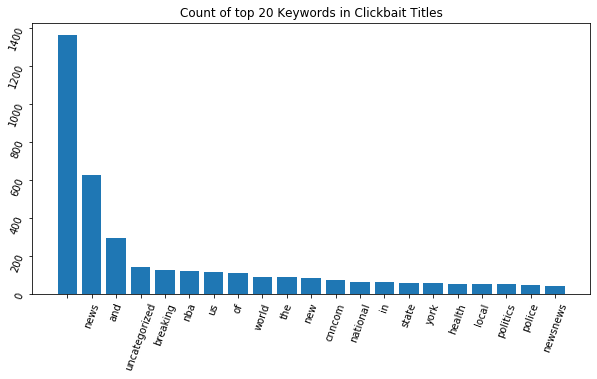

In [21]:
import matplotlib.pyplot as py

fig = py.figure(figsize=(10, 5))
plt = fig.add_subplot(111)
plt.bar(g_df[0:21]["targetKeywords"].values, g_df[0:21]["count"].values)
plt.tick_params(rotation=70)
plt.set_title("Count of top 20 Keywords in Clickbait Titles")


In [22]:
#cb_df

In [23]:
cb_df.explode("targetKeywords").groupby("targetKeywords").sum().sort_values("index", ascending=False)[1:]

,index,id,average_count,cb_average_count,no_cb_average_count,max_count,avgrage_popularity,max_popularity,min_popularity,min_count,normalized_min_count,normalized_avg_count
targetKeywords,,,,,,,,,,,,
uncategorized,73124.0,3.896312e+19,2148.442428,941.915519,1206.526909,9454.0,75459.759813,255515.0,190.0,141.0,-44.562644,-49.258218
news,39519.0,2.072288e+19,10842.714278,2904.475502,7938.238776,30723.0,27103.507554,66597.0,7580.0,982.0,-22.245465,-10.191195
watercooler,29050.0,1.278511e+19,697.612302,329.226587,368.385714,3003.0,27051.862302,94077.0,63.0,22.0,-14.660330,-16.174950
corporate,28401.0,1.095488e+19,170.660046,63.208233,107.451813,1527.0,46511.737340,80257.0,5246.0,24.0,-12.557898,-14.567955
industrialnews,28401.0,1.095488e+19,170.660046,63.208233,107.451813,1527.0,46511.737340,80257.0,5246.0,24.0,-12.557898,-14.567955
...,...,...,...,...,...,...,...,...,...,...,...,...
climate-contrarian,37.0,6.095189e+17,36.000000,10.800000,25.200000,143.0,1707.900000,5955.0,3.0,1.0,-0.698186,-0.765657
james-inhofe,37.0,6.095189e+17,36.000000,10.800000,25.200000,143.0,1707.900000,5955.0,3.0,1.0,-0.698186,-0.765657
tourists-behaving-badly,14.0,6.089265e+17,32.166667,13.333333,18.833333,143.0,1243.000000,3814.0,3.0,1.0,-0.698186,-0.771970


In [24]:
not_cb_df.explode("targetKeywords").groupby("targetKeywords").sum().sort_values("index", ascending=False)[1:]

,index,id,average_count,cb_average_count,no_cb_average_count,max_count,avgrage_popularity,max_popularity,min_popularity,min_count,normalized_min_count,normalized_avg_count
targetKeywords,,,,,,,,,,,,
news,141009.0,6.825041e+19,26443.039855,6774.032325,19669.007530,75924.0,97097.673100,292216.0,3530.0,723.0,-78.297505,-52.513649
breakingnews,128873.0,6.272194e+19,20629.724165,3782.931571,16846.792594,64375.0,31319.556807,125470.0,103.0,3133.0,-68.134123,-54.420820
uncategorized,102601.0,5.235577e+19,3286.055952,1298.694246,1987.361706,12284.0,92952.919246,298216.0,6562.0,210.0,-60.662740,-68.593061
worldnews,90071.0,4.263908e+19,6992.550556,1441.861303,5550.689254,28922.0,98233.314276,241368.0,14245.0,140.0,-49.425168,-48.658976
nba,89174.0,4.201814e+19,9938.387312,1868.770512,8069.616799,31231.0,33082.107992,117186.0,1100.0,2678.0,-44.734686,-42.904445
...,...,...,...,...,...,...,...,...,...,...,...,...
app,0.0,6.083104e+17,1.000000,0.000000,1.000000,1.0,4328.000000,4328.0,4328.0,1.0,-0.707642,-0.859405
boost,0.0,6.083104e+17,1.000000,0.000000,1.000000,1.0,4328.000000,4328.0,4328.0,1.0,-0.707642,-0.859405
gigabytes,0.0,6.083104e+17,1.000000,0.000000,1.000000,1.0,4328.000000,4328.0,4328.0,1.0,-0.707642,-0.859405


In [25]:
#how many keywords included hashtags?
df = pd.read_json("clickbait17-train-170331/instances.jsonl", lines=True)
df["targetKeywords"] = df["targetKeywords"].str.split('[ ,]')
df = df.explode("targetKeywords")
res_df = df["targetKeywords"].str.contains("#")
print(res_df.sum())
res_df.sum()/res_df.shape[0]

1


3.608024245922932e-05

In [26]:
#how many entries had keywords that included hashtags?
df = pd.read_json("clickbait17-train-170331/instances.jsonl", lines=True)
res_df = df["targetKeywords"].str.contains("#")
print(res_df.sum())
res_df.sum()/res_df.shape[0]

1


0.00040666937779585197

In [27]:
#I believe this is what the surveyors said, and I can't use that
pd.read_json("clickbait17-train-170331/truth.jsonl", lines=True).sort_values(by=['id'])

,id,truthJudgments,truthMean,truthMedian,truthMode,truthClass
861,607668877594497024,"[0.0, 0.6666667, 1.0, 1.0, 0.6666667]",0.666667,0.666667,1.000000,clickbait
1702,607671137062010880,"[0.33333334000000003, 0.0, 0.0, 0.0, 0.0]",0.066667,0.000000,0.000000,no-clickbait
216,607672568057700352,"[0.0, 0.0, 0.6666667, 0.33333334000000003, 0.0]",0.200000,0.000000,0.000000,no-clickbait
2192,607674674168926208,"[1.0, 0.6666667, 0.33333334000000003, 0.666666...",0.600000,0.666667,0.666667,clickbait
2285,607675444834398208,"[0.33333334000000003, 0.6666667, 0.0, 0.0, 0.6...",0.333333,0.333333,0.000000,no-clickbait
...,...,...,...,...,...,...
1302,610200047951609856,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.000000,0.000000,no-clickbait
1161,610200274658029568,"[1.0, 0.0, 0.33333334000000003, 0.333333340000...",0.400000,0.333333,0.333333,no-clickbait
1992,610201503752658944,"[0.0, 1.0, 1.0, 0.33333334000000003, 1.0]",0.666667,1.000000,1.000000,clickbait
934,610201840836186112,"[0.0, 0.0, 0.33333334000000003, 0.0, 0.6666667]",0.200000,0.000000,0.000000,no-clickbait


In [28]:
#competition's test data, not using since labels aren't provided
len(pd.read_json("clickbait17-unlabeled-170429/instances.jsonl", lines=True))


80013

#### Prepare for Dataset

In [31]:
import re

df = pd.read_json("clickbait17-train-170331/instances.jsonl", lines=True)
df["targetKeywords"] = df["targetKeywords"].str.lower().str.replace('[^\w\s]','').str.split('[ ,]')
df = df.explode("targetKeywords")

def count_words(word):
    return keyword_to_count[word]

def popularity_of_words(word):
    return keyword_to_popularity[word]

main_df = pd.read_json("clickbait17-train-170331/instances.jsonl", lines=True)
main_df["average_count"] = df["targetKeywords"].apply(count_words).reset_index().groupby(by=["index"]).mean()
main_df["max_count"] = df["targetKeywords"].apply(count_words).reset_index().groupby(by=["index"]).max()
main_df["avgerage_popularity"] = df["targetKeywords"].apply(popularity_of_words).reset_index().groupby(by=["index"]).mean()
main_df["max_popularity"] = df["targetKeywords"].apply(popularity_of_words).reset_index().groupby(by=["index"]).max()

main_df["min_popularity"] = df["targetKeywords"].apply(popularity_of_words).reset_index().groupby(by=["index"]).min()
main_df["min_count"] = df["targetKeywords"].apply(count_words).reset_index().groupby(by=["index"]).min()
df = pd.read_json("clickbait17-train-170331/truth.jsonl", lines=True)
main_df["label"] = df["truthClass"]

main_df["targetKeywords"] = main_df["targetKeywords"].str.lower().str.replace(' ', '').str.split('[,]')
vocab = set(main_df["targetKeywords"].explode().values)
word_to_ix = {word: i for i, word in enumerate(vocab)}


def remove_non_printable(string_val):
    #return ''.join([i for i in string_val if i in string.printable])
    return re.sub("[^a-zA-Z0-9 \'\",]+", '', string_val)

main_df["targetTitle"] = main_df["targetTitle"].apply(remove_non_printable)

main_df.shape[0]

2459

In [32]:
word_to_ix

{'': 0,
 'gives': 1,
 'trademark': 2,
 'doreenluckie': 3,
 'mudhentavern': 4,
 'economicnews': 5,
 "u.s.women'ssoccerteam:extrovertsenterworldcup-cnn.com": 6,
 'how-to-cut-fruit': 7,
 'goldman%20sachs%20group': 8,
 'highwaytrustfund': 9,
 'priests': 10,
 'electriclightandpower': 11,
 'experts': 12,
 'chicagoblackhawks': 13,
 'worldoceansday': 14,
 'defensedepartment': 15,
 'patients': 16,
 'quarantines': 17,
 "mother'sdaykidnote": 18,
 'rosie': 19,
 'finals': 20,
 'jurassicworldrealistic': 21,
 'kyliejennertyga': 22,
 'workplaceadvicecolumn': 23,
 'alienation': 24,
 'circles': 25,
 'jessiej': 26,
 'generallaborissues': 27,
 'placenta': 28,
 'ediefalco': 29,
 'unearth': 30,
 '533228.by': 31,
 'teennewplanet': 32,
 'wunderman': 33,
 'columbiauniversity': 34,
 'deer': 35,
 'beverlyhills': 36,
 'whitlockjason': 37,
 'ftfsectionexperts': 38,
 'dennishastertpleadsnotguiltyonallcounts-cnnpolitics.com': 39,
 'mickinneytexas': 40,
 'janner': 41,
 'eggfarminvestigation': 42,
 'dskacquitted': 43,

In [33]:
main_df.head()

,id,postTimestamp,postText,postMedia,targetTitle,targetDescription,targetKeywords,targetParagraphs,targetCaptions,average_count,max_count,avgerage_popularity,max_popularity,min_popularity,min_count,label
0,608310377143799808,Tue Jun 09 16:31:10 +0000 2015,[Apple's iOS 9 'App thinning' feature will giv...,[],Apple gives back gigabytes iOS 9 'app thinning...,'App thinning' will be supported on Apple's iO...,"[apple, gives, gigabytes, ios, 9, app, thinnin...",[Paying for a 64GB phone only to discover that...,['App thinning' will be supported on Apple's i...,1.000000,1.0,4328.000000,4328,4328,1.0,no-clickbait
1,609297109095972864,Fri Jun 12 09:52:05 +0000 2015,[RT @kenbrown12: Emerging market investors are...,[media/609297109095972864.jpg],Emerging Markets Suffer Largest Outflow in Sev...,Global investors have yanked $9.3 billion from...,"[emergingmarket, emergingmarkets, emflows, emi...","[Emerging markets are out of favor., Global in...","[Stocks Fall as Investors Watch Central Banks,...",64.700000,625.0,2998.800000,5920,1,1.0,no-clickbait
2,609504474621612032,Fri Jun 12 23:36:05 +0000 2015,[U.S. Soccer should start answering tough ques...,[],US Soccer should start answering tough questio...,A U.S. Senator's scathing letter questioned U....,[],"[WINNIPEG, Manitoba – The bubble U.S. Soccer i...",[US to vote for Ali in FIFA election and not B...,1360.000000,1360.0,0.000000,0,0,1360.0,clickbait
3,609748367049105408,Sat Jun 13 15:45:13 +0000 2015,[How theme parks like Disney World left the mi...,[],How theme parks like Disney World left the mid...,"America's top family vacation spots, like the ...","[disney, disneyworld, disneyticketprices, disn...",[When Walt Disney World opened in an Orlando s...,"[Some 1,000 persons turned out in Albuquerque,...",99.052632,1360.0,290.157895,1183,0,2.0,no-clickbait
4,608688782821453824,Wed Jun 10 17:34:49 +0000 2015,[Could light bulbs hurt your health? One compa...,[media/608688782821453825.jpg],Warning labels on your light bulbs,One company will put a health notice on all th...,"[health, shouldtherebewarninglabelsonyourlight...",[(CNN)The light bulb always makes the world's ...,[Electric lights have made the world safer and...,223.461538,1360.0,1043.307692,4492,0,1.0,clickbait


In [34]:
training_size = int(main_df.shape[0]*1)

#100% for training
train_df = main_df.sample(n=training_size, replace=True)
train_df_just_cb = train_df[train_df["label"] == "clickbait"]
#20% for validation
#test_df = main_df.sample(n=main_df.shape[0]-training_size, replace=True)


#With replacement, SO assuming population is independent
train_df_just_cb.head()

,id,postTimestamp,postText,postMedia,targetTitle,targetDescription,targetKeywords,targetParagraphs,targetCaptions,average_count,max_count,avgerage_popularity,max_popularity,min_popularity,min_count,label
464,609026298824916992,Thu Jun 11 15:55:59 +0000 2015,"[RT @TheFix: You haven't played our 2016 ""Gues...",[media/609026298824916992.png],Presenting The 2016 version of Guess Who,Play against the Magic Fix Robot -- or a frien...,"[2016, interactive, jebbush, scottwalker, bern...","[As I write this, 21 Republicans and seven Dem...",[],6.842105,27.0,1312.789474,5931,40,1.0,clickbait
1926,608748953123876864,Wed Jun 10 21:33:55 +0000 2015,[The non-apology of the year award goes to Nob...,[],The nonapology of the year award goes to Nobel...,"He's sorry he offended, but not sorry for bein...","[science, sexism, stem, sexisminscience, femin...",[Earlier this week at the World Conference of ...,"[Tim Hunt, winner of the Nobel Prize for Medic...",12.222222,64.0,520.777778,1188,13,2.0,clickbait
14,608926452596273152,Thu Jun 11 09:19:14 +0000 2015,[Tourists detained in Malaysia for getting nak...,[media/608926452596273152.jpg],Tourists detained in Malaysia for getting nake...,More tourists are in trouble for getting naked...,"[travel, destinations, uncategorized, us-world...",[More tourists are in trouble for getting nake...,[Four tourists have been detained after stripp...,32.166667,143.0,1243.000000,3814,3,1.0,clickbait
1854,607968103264317440,Mon Jun 08 17:51:05 +0000 2015,[RT @CNNMoney: Here's what you need to know ab...,[media/607968103264317440.png],Apple updates iPhone Mac software,Apple showed off improvements to OS X El Capit...,"[apple, wwdc2015, developerconference, streami...",[],"[See Apple's iOS 9 in :90, This Rolls Royce is...",9.700000,28.0,1421.100000,5872,39,1.0,clickbait
1037,608849901636694016,Thu Jun 11 04:15:03 +0000 2015,[RT @CNNPolitics: .@JebBush spoke to Angela Me...,[media/608849901636694016.png],Jeb Bush spoke to Angela Merkel while in Germany,"While abroad, 2016 presidential hopeful Jeb Bu...","[politics, jebbushspoketoangelamerkelwhileinge...","[(CNN)While abroad, 2016 presidential hopeful ...",[Jeb Bush Germany Chancellor Merkel Election 2...,130.250000,1360.0,995.916667,5544,0,1.0,clickbait


In [35]:
2459 - len(train_df_just_cb)

1721

In [38]:
new_df = main_df.copy()
#new_df["targetKeywords"] = new_df["targetKeywords"].str.lower().str.replace('[^\w\s]','').str.split('[ ,]')
v_df = new_df.explode('targetKeywords').groupby(['targetKeywords']).count().sort_values(by="id", ascending=False)
v_df.head(5)

,id,postTimestamp,postText,postMedia,targetTitle,targetDescription,targetParagraphs,targetCaptions,average_count,max_count,avgerage_popularity,max_popularity,min_popularity,min_count,label
targetKeywords,,,,,,,,,,,,,,,
,927,927,927,927,927,927,927,927,927,927,927,927,927,927,927
uncategorized,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150
news,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
breakingnews,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123
worldnews,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88


In [39]:
#No vocab size


# CHOOSING THRESHOLD 4 NEW 

# TRAINING SET WITHOUT OUTLIER COUNTS

In [40]:
print(main_df.shape[0])
print(main_df[main_df["average_count"] > 5].shape[0])
print(main_df[main_df["average_count"] > 10].shape[0])
print(main_df[main_df["average_count"] > 50].shape[0])

2459
2019
1880
1490


In [41]:
#remove outlier for training
s_5 = main_df[main_df["average_count"] > 5]

training_size5 = int(s_5.shape[0]*1)

#80% for training
train_df5 = s_5.sample(n=training_size5, replace=True)

v_df5 = train_df5.explode('targetKeywords').groupby(['targetKeywords']).count().sort_values(by="id", ascending=False)
v_size5 = v_df5.shape[0]
v_size5

2655

In [42]:
#remove outlier for training
s_10 = main_df[main_df["average_count"] > 10]

training_size10 = int(s_10.shape[0]*1)

#80% for training
train_df10 = s_10.sample(n=training_size10, replace=True)

v_df10 = train_df10.explode('targetKeywords').groupby(['targetKeywords']).count().sort_values(by="id", ascending=False)
v_size10 = v_df10.shape[0]
v_size10

2164

In [43]:
#remove outlier for training
s_50 = main_df[main_df["average_count"] > 50]

training_size50 = int(s_50.shape[0]*1)

#80% for training
train_df50 = s_50.sample(n=training_size50, replace=True)

v_df50 = train_df50.explode('targetKeywords').groupby(['targetKeywords']).count().sort_values(by="id", ascending=False)
v_size50 = v_df50.shape[0]
v_size50

1295

In [44]:
# Get a random sequence of the Shakespeare dataset.




#DONT NEED THIS, ALREADY RANDOM!!!!!!!!
def get_random_seq():
 
    start_index = random.randint(0, train_df_just_cb.shape[0]-1)
    
    #label part won't work for testing, actually we don't need testing
    #print(start_index)
    return train_df_just_cb.iloc[start_index][["targetTitle", "targetKeywords", "average_count", "max_count", "avgerage_popularity", "max_popularity", "min_popularity", "min_count"]]

# Convert the sequence to one-hot tensor.
def seq_to_onehot(seq):
    tensor = torch.zeros(len(seq), 1, n_chars) 
    # Shape of the tensor:
    #     (sequence length, batch size, classes)
    # Here we use batch size = 1 and classes = number of unique characters.
    
    for t, char in enumerate(seq):
        try:
            index = all_chars.index(char)
        except ValueError as e:
            print(seq, char)
            raise
        tensor[t][0][index] = 1
    return tensor

# Convert the sequence to index tensor.
def seq_to_index(seq):
    tensor = torch.zeros(len(seq), 1)
    # Shape of the tensor: 
    #     (sequence length, batch size).
    # Here we use batch size = 1.
    for t, char in enumerate(seq):
        tensor[t] = all_chars.index(char)
    return tensor

# Sample a mini-batch including input tensor and target tensor.
def get_input_and_target():
    seq    = get_random_seq()
    #print(seq_to_onehot(seq["targetTitle"][:-1]).float())
    input1, input2  = (seq_to_onehot(seq["targetTitle"][:-1]).float(), torch.from_numpy(numpy.asarray(seq[["average_count", "max_count", "avgerage_popularity", "max_popularity", "min_popularity", "min_count"]].to_numpy()).astype('float')).float())    # Input is represented in one-hot.
    
    input3 = torch.tensor([])
    try:
        input3 = context_idxs = torch.tensor([word_to_ix[w] for w in seq["targetKeywords"]], dtype=torch.long)
    except KeyError as e:
        input3 = torch.tensor([], dtype=torch.long)
        
    target = seq_to_index(seq["targetTitle"][1:]).long() # Target is represented in index.
    return input1, input2, input3, target

In [45]:
torch.from_numpy(numpy.asarray(main_df.iloc[0][["average_count", "max_count", "avgerage_popularity", "max_popularity", "min_popularity", "min_count"]].to_numpy()).astype('float'))

tensor([1.0000e+00, 1.0000e+00, 4.3280e+03, 4.3280e+03, 4.3280e+03, 1.0000e+00],
       dtype=torch.float64)

#### Choose a Device

In [46]:
# If there are GPUs, choose the first one for computing. Otherwise use CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  
# If 'cuda:0' is printed, it means GPU is available.

cpu


In [47]:
set(''.join(list(main_df["targetTitle"].ravel())))

{' ',
 '"',
 "'",
 ',',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [57]:
vocab_size_for_keywords = train_df.explode("targetKeywords")["targetKeywords"].unique().size
vocab_size_for_keywords

4517

In [58]:
train_df["targetKeywords"]

464     [2016, interactive, jebbush, scottwalker, bern...
1636    [big, band, leader, james, famed, trademark, h...
1926    [science, sexism, stem, sexisminscience, femin...
14      [travel, destinations, uncategorized, us-world...
2049    [android, applewatch, garagedooropener, homeki...
                              ...                        
1681    [us, newyorkprisonemployeearraignedonfelony-cn...
1591    [police, policebrutalitymisconductandshootings...
239                                                    []
789     [kaliefbrowder, suicide, rikers, rikersisland,...
185     [sergio, canavero, said, needs, america, s, he...
Name: targetKeywords, Length: 2459, dtype: object

#### Network Definition

In [60]:
import numpy as np

#ASSUMING ALL ARE THERE
all_chars = string.printable
n_chars = len(all_chars)

#TRAIN, TUNE PARAMS, AND TEST THIS TWICE
#SAME RNN CLASS FOR desc and title!

#Keywords data (can't pass in actual words) passed into both
class Net(nn.Module):
    def __init__(self, vocab_size, vocab_sizeKW):
        # Initialization.
        super(Net, self).__init__()
        self.input_size  = n_chars   # Input size: Number of unique chars.
        self.hidden_size = 100       # Hidden size: 100.
        self.output_size = n_chars   # Output size: Number of unique chars.
        
        
        #self.forget_gate1 = nn.Sigmoid()
        #self.forget_gate2 = nn.Sigmoid()
        
        #word embeddings?
        #giving index, I have those
        #WHAT IF WORD IN TEST was NOT IN TRAINING!
        
        #similrity, embedding have 10 meanings
        
        #added embeddings!
        embedding_dim = 10
        self.embeddings = nn.Embedding(vocab_sizeKW, embedding_dim)
        
        
        
        
        #Dropout is the probability a neuron doesn't get updated (or just removed?)
        #Prevents "co-adaptation" in overfitted model
        self.rnn1 = nn.RNNCell(self.input_size, self.hidden_size)
        self.rnn2 = nn.RNNCell(self.hidden_size, self.hidden_size)
        self.lin = nn.Linear(self.hidden_size, self.output_size)

        
        #Inner NN!!
        self.nnSigmoidForgetInput1 = nn.Sigmoid()
        self.nnSigmoidForgetInput2 = nn.Sigmoid()
        self.nnLinearForgetInput1 = nn.Linear(200, 1)
        self.nnLinearForgetInput2 = nn.Linear(200, 1)
        
        self.sigmoid = nn.Sigmoid()
        self.nnOutput = nn.Linear(16, 10)
        
        self.lastNN = nn.Linear(50+n_chars, n_chars)
        
    #HAVE TO ONE HOT ENCODE all chars!
    #(input vector of 26, only one 1, 1 0 ... is a)
    
    #"in get_input_and_target()"
    #GETS A RANDOM SEQUENCE FOR EACH TRAIN and 
    #(doesn't matter if already used)
     
     #    random sequence is input,target
     #seq of length 128
     #input is everything but the last character
     #target is everything but the first character
    
    #droupout is implemented
    #not using softmax so temperature is not implemented!!
    
     #Stack with NN
     #Do seperate rnns
     #Do 1 NN (MSE, Team, etc. from dataset)
     #LAST STEP OF FORWARD PROP: Input a vector with [rnn outputs, nn output]
     #    into another nn!
    
    def forward(self, input1, input2, input3, hidden1, hidden2):#, hidden1):
        """ Forward function.
              input:  One-hot input. It refers to the x_t in homework write-up.
              hidden: Previous hidden state. It refers to the h_{t-1}.
            Returns (output, hidden) where output refers to y_t and 
                     hidden refers to h_t.
        """
        # Forward function.
        #hidden = ###### To be filled ######
        #output = ###### To be filled ######
        
        #input dropout and recurrent dropout
        
        
        mask_dropout_input = torch.from_numpy(np.random.choice([0,1], size=input1.shape, p=[.5, .5]))
        mask_dropout_hidden1 = torch.from_numpy(np.random.choice([0,1], size=hidden1.shape, p=[.5, .5]))  
        mask_dropout_hidden2 = torch.from_numpy(np.random.choice([0,1], size=hidden2.shape, p=[.5, .5]))  
        
        hidden1 = self.rnn1((input1*mask_dropout_input).float(), (hidden1*mask_dropout_hidden1).float())
        hidden2 = self.rnn2(hidden1, (hidden2*mask_dropout_hidden2).float())
        
        #passed in concatation of input with hidden
        #print(input1.flatten())
        #print(hidden1.flatten())
        #print(torch.cat((input1.flatten(), hidden1.flatten()), dim=0))
        forget_mask1 = self.nnSigmoidForgetInput1(self.nnLinearForgetInput1(torch.cat((input1.flatten(), hidden1.flatten()), dim=0)))
        forget_mask2 = self.nnSigmoidForgetInput2(self.nnLinearForgetInput2(torch.cat((hidden1.flatten(), hidden2.flatten()), dim=0)))
        
        
        #print("Embedding FlattenedOutput: ", self.embeddings(input3).flatten())
        #print("Embedding Shape: ", self.embeddings(input3).shape)
        #print("Embedding Output: ", self.embeddings(input3)[:5,:])
        
        #print("input2: ", input2)
        
        #print("Concat works!!: ", torch.cat((self.embeddings(input3).flatten(), input2), dim=0))
        
        statsOut = ...
        #print(len(input3))
        
        in_bet = self.embeddings(input3)
        if len(in_bet) == 0 or in_bet.shape[0] < 5:
            if len(in_bet) == 0:
                in_bet = torch.tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.float)
            while in_bet.shape[0] < 5:
                in_bet = torch.cat((in_bet, torch.tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.float)), dim=0)
        
        #print(torch.cat((input2, input2, input2, input2, input2), 0).shape)
        #print(in_bet[:5, :].shape)
        #print(torch.tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.float).shape)
        
        reshaped_2 = input2.view((1, input2.size()[0]))
        
        #print(torch.cat((reshaped_2, reshaped_2, reshaped_2, reshaped_2, reshaped_2), 1).shape)
        
        in_bet2 = torch.cat((in_bet[:5, :], torch.cat((reshaped_2, reshaped_2, reshaped_2, reshaped_2, reshaped_2), 0) ), dim=1)

        in_bet2 = in_bet2.view((in_bet2.shape[0], 1, in_bet2.shape[1]))
        
        statsOut = self.nnOutput(in_bet2)

        
        #statsOut = self.nnOutput(input2)
        
        #print(self.lin(hidden2))
        #print(statsOut)
        
        
        #hidden2.shape
        
        #print("Last 2 shapes:", hidden2.shape)
        #print(statsOut.view((1, 50)).shape)
        
        output = self.lastNN(torch.cat((hidden2, statsOut.view((1, 50))), dim=1))
        
        
        #I tried implementing a dropout to prevent coadaptation
        #And a forget gate from LSTMs 
            #LSTMS use this for larger input (handles against short term memory)
                #Trains sigmoid to forget some inputs
        
        #print("forget_mask1", forget_mask1.shape)
        #print("hidden1", hidden1.shape)
        hidden1 = hidden1*forget_mask1
        hidden2 = hidden2*forget_mask2
        
    #self.h = np.tanh(np.dot(self.W_hh, self.h) + np.dot(self.W_xh, x))
    #y = np.dot(self.W_hy, self.h)

        return output, hidden1, hidden2#, hidden1

    def init_hidden(self):
        # Initial hidden state.
        # 1 means batch size = 1.
     
     
         #TRY ONE WITH RANDOM INIT
     
        return torch.zeros(1, self.hidden_size).to(device) 
    
    
    
#The init function
    
vocab_s_of_keywords = v_df.shape[0]
net = Net(n_chars, len(vocab))     # Create the network instance.
net.to(device)  # Move the network parameters to the specified device.

Net(
  (embeddings): Embedding(6495, 10)
  (rnn1): RNNCell(100, 100)
  (rnn2): RNNCell(100, 100)
  (lin): Linear(in_features=100, out_features=100, bias=True)
  (nnSigmoidForgetInput1): Sigmoid()
  (nnSigmoidForgetInput2): Sigmoid()
  (nnLinearForgetInput1): Linear(in_features=200, out_features=1, bias=True)
  (nnLinearForgetInput2): Linear(in_features=200, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (nnOutput): Linear(in_features=16, out_features=10, bias=True)
  (lastNN): Linear(in_features=150, out_features=100, bias=True)
)

In [61]:
import numpy as np

#ASSUMING ALL ARE THERE
all_chars = string.printable
n_chars = len(all_chars)

#TRAIN, TUNE PARAMS, AND TEST THIS TWICE
#SAME RNN CLASS FOR desc and title!

#Keywords data (can't pass in actual words) passed into both
class Net2(nn.Module):
    def __init__(self, vocab_size, vocab_sizeKW):
        # Initialization.
        super(Net2, self).__init__()
        self.input_size  = n_chars   # Input size: Number of unique chars.
        self.hidden_size = 100       # Hidden size: 100.
        self.output_size = n_chars   # Output size: Number of unique chars.
        
        
        #self.forget_gate1 = nn.Sigmoid()
        #self.forget_gate2 = nn.Sigmoid()
        
        #word embeddings?
        #giving index, I have those
        #WHAT IF WORD IN TEST was NOT IN TRAINING!
        
        #similrity, embedding have 10 meanings
        
        #added embeddings!
        embedding_dim = 10
        self.embeddings = nn.Embedding(vocab_sizeKW, embedding_dim)
        
        
        
        
        #Dropout is the probability a neuron doesn't get updated (or just removed?)
        #Prevents "co-adaptation" in overfitted model
        self.rnn1 = nn.RNNCell(self.input_size, self.hidden_size)
        self.rnn2 = nn.RNNCell(self.hidden_size, self.hidden_size)
        self.lin = nn.Linear(self.hidden_size, self.output_size)

        
        #Inner NN!!
        self.nnSigmoidForgetInput1 = nn.Sigmoid()
        self.nnSigmoidForgetInput2 = nn.Sigmoid()
        self.nnLinearForgetInput1 = nn.Linear(200, 100)
        self.nnLinearForgetInput2 = nn.Linear(200, 100)
        
        
        self.lastNN = nn.Linear(50+n_chars, n_chars)
        
    #HAVE TO ONE HOT ENCODE all chars!
    #(input vector of 26, only one 1, 1 0 ... is a)
    
    #"in get_input_and_target()"
    #GETS A RANDOM SEQUENCE FOR EACH TRAIN and 
    #(doesn't matter if already used)
     
     #    random sequence is input,target
     #seq of length 128
     #input is everything but the last character
     #target is everything but the first character
    
    #droupout is implemented
    #not using softmax so temperature is not implemented!!
    
     #Stack with NN
     #Do seperate rnns
     #Do 1 NN (MSE, Team, etc. from dataset)
     #LAST STEP OF FORWARD PROP: Input a vector with [rnn outputs, nn output]
     #    into another nn!
    
    def forward(self, input1, input2, input3, hidden1, hidden2):#, hidden1):
        """ Forward function.
              input:  One-hot input. It refers to the x_t in homework write-up.
              hidden: Previous hidden state. It refers to the h_{t-1}.
            Returns (output, hidden) where output refers to y_t and 
                     hidden refers to h_t.
        """
        # Forward function.
        #hidden = ###### To be filled ######
        #output = ###### To be filled ######
        
        #input dropout and recurrent dropout
        
        
        mask_dropout_input = torch.from_numpy(np.random.choice([0,1], size=input1.shape, p=[.5, .5]))
        mask_dropout_hidden1 = torch.from_numpy(np.random.choice([0,1], size=hidden1.shape, p=[.5, .5]))  
        mask_dropout_hidden2 = torch.from_numpy(np.random.choice([0,1], size=hidden2.shape, p=[.5, .5]))  
        
        hidden1 = self.rnn1((input1*mask_dropout_input).float(), (hidden1*mask_dropout_hidden1).float())
        hidden2 = self.rnn2(hidden1, (hidden2*mask_dropout_hidden2).float())
        
        #passed in concatation of input with hidden
        #print(input1.flatten())
        #print(hidden1.flatten())
        #print(torch.cat((input1.flatten(), hidden1.flatten()), dim=0))
        forget_mask1 = self.nnSigmoidForgetInput1(self.nnLinearForgetInput1(torch.cat((input1.flatten(), hidden1.flatten()), dim=0)))
        forget_mask2 = self.nnSigmoidForgetInput2(self.nnLinearForgetInput2(torch.cat((hidden1.flatten(), hidden2.flatten()), dim=0)))
        
        forget_mask1 = (forget_mask1>0.5).float()
        forget_mask2 = (forget_mask2>0.5).float()
        
        #print("Embedding FlattenedOutput: ", self.embeddings(input3).flatten())
        #print("Embedding Shape: ", self.embeddings(input3).shape)
        #print("Embedding Output: ", self.embeddings(input3)[:5,:])
        
        #print("input2: ", input2)
        
        #print("Concat works!!: ", torch.cat((self.embeddings(input3).flatten(), input2), dim=0))
        
        #print(len(input3))
        
        in_bet = self.embeddings(input3).flatten()
        in_bet = in_bet.view((1, in_bet.size()[0]))
        in_bet = torch.cat((in_bet, torch.zeros(1, 50-in_bet.size()[1])), dim=1)
        
        #print(hidden2.shape)
        #print(in_bet.shape)
        
        output = self.lastNN(torch.cat((hidden2, in_bet), dim=1))
        
        
        #I tried implementing a dropout to prevent coadaptation
        #And a forget gate from LSTMs 
            #LSTMS use this for larger input (handles against short term memory)
                #Trains sigmoid to forget some inputs
        
        #print("forget_mask1", forget_mask1.shape)
        #print("hidden1", hidden1.shape)
        
        #print(forget_mask1)
        #print(forget_mask2)
        hidden1 = hidden1*forget_mask1
        hidden2 = hidden2*forget_mask2
        
    #self.h = np.tanh(np.dot(self.W_hh, self.h) + np.dot(self.W_xh, x))
    #y = np.dot(self.W_hy, self.h)

        return output, hidden1, hidden2#, hidden1

    def init_hidden(self):
        # Initial hidden state.
        # 1 means batch size = 1.
     
     
         #TRY ONE WITH RANDOM INIT
     
        return torch.zeros(1, self.hidden_size).to(device) 
    
    
    
#The init function
    
vocab_s_of_keywords = v_df.shape[0]
net2 = Net2(n_chars, len(vocab))     # Create the network instance.
net2.to(device)  # Move the network parameters to the specified device.

Net2(
  (embeddings): Embedding(6495, 10)
  (rnn1): RNNCell(100, 100)
  (rnn2): RNNCell(100, 100)
  (lin): Linear(in_features=100, out_features=100, bias=True)
  (nnSigmoidForgetInput1): Sigmoid()
  (nnSigmoidForgetInput2): Sigmoid()
  (nnLinearForgetInput1): Linear(in_features=200, out_features=100, bias=True)
  (nnLinearForgetInput2): Linear(in_features=200, out_features=100, bias=True)
  (lastNN): Linear(in_features=150, out_features=100, bias=True)
)

In [62]:
#Basic RNN model

class NetBaseline(nn.Module):
    def __init__(self):
        # Initialization.
        super(NetBaseline, self).__init__()
        self.input_size  = n_chars   # Input size: Number of unique chars.
        self.hidden_size = 100       # Hidden size: 100.
        self.output_size = n_chars   # Output size: Number of unique chars.
        
        self.rnn = nn.RNNCell(self.input_size, self.hidden_size)
        self.lin = nn.Linear(self.hidden_size, self.output_size)


    
    def forward(self, input1, input2, input3, hidden1, hidden2):#, hidden1):
        """ Forward function.
              input:  One-hot input. It refers to the x_t in homework write-up.
              hidden: Previous hidden state. It refers to the h_{t-1}.
            Returns (output, hidden) where output refers to y_t and 
                     hidden refers to h_t.
        """
        # Forward function.
        #hidden = ###### To be filled ######
        #output = ###### To be filled ######
        hidden1 = self.rnn(input1, hidden1)
        output = self.lin(hidden1)
        

        return output, hidden1, hidden2#, hidden1

    def init_hidden(self):
        # Initial hidden state.
        # 1 means batch size = 1.
        return torch.zeros(1, self.hidden_size).to(device) 
    
netBase = NetBaseline()     # Create the network instance.
netBase.to(device)  # Move the network parameters to the specified device.

NetBaseline(
  (rnn): RNNCell(100, 100)
  (lin): Linear(in_features=100, out_features=100, bias=True)
)

In [63]:
#Metric to check accuracy

#USE ON BOTH DESCRIPTION AND TITLE
class Net_for_Accuracy(nn.Module):
    def __init__(self, num_labels, vocab_size):
        # Initialization.
        super(Net_for_Accuracy, self).__init__()
        
        self.linear = nn.Linear(vocab_size, num_labels)

    def forward(self, bow_vec):
        return F.log_softmax(self.linear(bow_vec), dim=1)

    
netAcc = Net_for_Accuracy(2, vocab_s_of_keywords)     # Create the network instance.
netAcc.to(device)  # Move the network parameters to the specified device.

Net_for_Accuracy(
  (linear): Linear(in_features=6495, out_features=2, bias=True)
)

#### Training Step and Evaluation Step

In [64]:
# Training step function.
def train_step(net, opt, input1, input2, input3, target):
    """ Training step.
        net:    The network instance.
        opt:    The optimizer instance.
        input:  Input tensor.  Shape: [seq_len, 1, n_chars].
        target: Target tensor. Shape: [seq_len, 1].
    """
    seq_len = input1.shape[0]    # Get the sequence length of current input.
    hidden1 = net.init_hidden()  # Initial hidden state.
    hidden2 = net.init_hidden()
    
    net.zero_grad()             # Clear the gradient.
    loss = 0                    # Initial loss.

    for t in range(seq_len):    # For each one in the input sequence.
        output, hidden1, hidden2 = net(input1[t], input2, input3, hidden1, hidden2)
        loss += loss_func(output, target[t])

    loss.backward()             # Backward. 
    opt.step()                  # Update the weights.

    return loss / seq_len       # Return the average loss w.r.t sequence length.

In [65]:
# Evaluation step function.
def eval_step(net, init_seq='W', init_i2=torch.tensor([0, 0, 0, 0, 0, 0], dtype=torch.float), init_i3=torch.tensor([5446, 4072, 1836,  501,  882, 6312], dtype=torch.long), predicted_len=100):
    # Initialize the hidden state, input and the predicted sequence.
    hidden1        = net.init_hidden()
    hidden2        = net.init_hidden()
    
    init_input    = seq_to_onehot(init_seq).to(device)
    predicted_seq = init_seq

    # Use initial string to "build up" hidden state.
    for t in range(len(init_seq) - 1):
        output, hidden1, hidden2 = net(init_input[t], init_i2, init_i3, hidden1, hidden2)
        
    # Set current input as the last character of the initial string.
    input1 = init_input[-1]
    input2 = init_i2
    input3 = init_i3
    
    # Predict more characters after the initial string.
    for t in range(predicted_len):
        # Get the current output and hidden state.
        output, hidden1, hidden2 = net(input1, input2, input3, hidden1, hidden2)
        
        # Sample from the output as a multinomial distribution.
        predicted_index = torch.multinomial(output.view(-1).exp(), 1)[0]
        
        # Add predicted character to the sequence and use it as next input.
        predicted_char  = all_chars[predicted_index]
        predicted_seq  += predicted_char
        
        # Use the predicted character to generate the input of next round.
        input1 = seq_to_onehot(predicted_char)[0].to(device)

    return predicted_seq

#### Training Procedure

In [66]:
all_chars

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [67]:
import re
s = 'as32{ vd"s, \' k!+'
print(re.sub("[^a-zA-Z0-9 \'\",]+", '', s))

as32 vd"s, ' k


In [68]:
torch.tensor([word_to_ix[w] for w in main_df[main_df["label"] == "clickbait"].reset_index().iloc[3]["targetKeywords"]], dtype=torch.long)

tensor([5062, 5994, 5634, 1238, 2235, 1457])

In [69]:
# Number of iterations.
iters       = 500  # Number of training iterations.
print_iters = 100    # Number of iterations for each log printing.


#iters       = 15000  # Number of training iterations.
#print_iters = 100    # Number of iterations for each log printing.

# The loss variables.
all_losses = []
loss_sum   = 0

# Initialize the optimizer and the loss function.
opt       = torch.optim.Adam(net2.parameters(), lr=0.005)
loss_func = nn.CrossEntropyLoss()


# Training procedure.
for i in range(iters):
    input1, input2, input3, target = get_input_and_target()            # Fetch input and target.
    #print("Input1 and Input2:", input1, input2, input3)
    #print("Target:", target)
    #print("target should be rest of title")
    input1 = input1.to(device)
    input2 = input2.to(device)
    #print(input3)
    input3 = input3.to(device)
    target = target.to(device) # Move to GPU memory.
    
    #print(input1)
    
    loss      = train_step(net2, opt, input1, input2, input3[:min(5, input3.size()[0])], target)   # Calculate the loss.
    loss_sum += loss                                  # Accumulate the loss.
    
    #print("Iteration: ", i)

    # Print the log.
    if i % print_iters == print_iters - 1:
        print('iter:{}/{} loss:{}'.format(i, iters, loss_sum / print_iters))
        print('generated sequence: {}\n'.format(eval_step(net)))
              
        # Track the loss.
        all_losses.append(loss_sum / print_iters)
        loss_sum = 0
        
        
        
        
        #concat to each row
        #slice tensors
            #get [:5, ]

KeyboardInterrupt: 

In [ ]:
#Baseline Performance!!!!

# Number of iterations.
iters       = 5000  # Number of training iterations.
print_iters = 100    # Number of iterations for each log printing.


#iters       = 15000  # Number of training iterations.
#print_iters = 100    # Number of iterations for each log printing.

# The loss variables.
all_losses = []
loss_sum   = 0

# Initialize the optimizer and the loss function.
opt       = torch.optim.Adam(netBase.parameters(), lr=0.005)
loss_func = nn.CrossEntropyLoss()


# Training procedure.
for i in range(iters):
    input1, input2, input3, target = get_input_and_target()            # Fetch input and target.
    #print("Input1 and Input2:", input1, input2, input3)
    #print("Target:", target)
    #print("target should be rest of title")
    input1 = input1.to(device)
    input2 = input2.to(device)
    #print(input3)
    input3 = input3.to(device)
    target = target.to(device) # Move to GPU memory.
    
    #print(input1)
    
    loss      = train_step(netBase, opt, input1, input2, input3[:min(5, input3.size()[0])], target)   # Calculate the loss.
    loss_sum += loss                                  # Accumulate the loss.
    
    #print("Iteration: ", i)

    # Print the log.
    if i % print_iters == print_iters - 1:
        print('iter:{}/{} loss:{}'.format(i, iters, loss_sum / print_iters))
        print('generated sequence: {}\n'.format(eval_step(net)))
              
        # Track the loss.
        all_losses.append(loss_sum / print_iters)
        loss_sum = 0

iter:99/5000 loss:2.6719906330108643
;<c^-oRd.4l'ZyQ1oJ	I8fQ/Tal'g`9fU=9[K@1FxkFq

iter:199/5000 loss:2.5289058685302734
generated sequence: WLpLLPpWZQxk2/,P=%!<q2Fg##^WHXGUM;wvLu8tK
8/*QGZ[O@a473_Q A\d)m1\.`8bpVO
?cEu<.it~TV7H T|Udd{

iter:299/5000 loss:2.555358648300171
generated sequence: W$VHi/gOVCYMfZ8^[v3+O0=S[\z-+/UFCV]*#wc|~e4-Q)R/n;/DAu|raRrw7UgdBde.eJ<r%P[Go|2 =F2y{Zrbd`"cxDMXY+|

iter:399/5000 loss:2.561206102371216
generated sequence: Wb'8X-qrD/)NwK\OE)cu5FP3zww]bfSjc!m17}AQ[
:lME{9hm$I=|	g^u8"OpHD;pEDD0D.*>u#b[
)^H/aUQhoa

iter:499/5000 loss:2.540574073791504
uKdE727@ sequence: W_opCd+6bS7OrHPNRnnh$y-~xw"$[eG(i
g._u@	UvHCtmOw?bB}N)&#x;niWBEIye^u1f.:gxzYkxqz\e_\npf\2Dh

iter:599/5000 loss:2.4234838485717773
695De$ll2fNW1yM3<-4g0n?]^vc ?G]FX:5Q YI8BsyyAy&tX)C\A5!bh2?&&P
qp?4

iter:699/5000 loss:2.425283193588257
generated sequence: Wq)7WA``4TT)+Kw79O^u0K
,WNJ9<?u:pXvy2 Rqhfq%{JhjYnK0gm5<4m

iter:799/5000 loss:2.3923308849334717
-Uo|f3r<F;0mQI}ih^WQ/]iqP4(RSoQ#Kn> b

In [ ]:


#2.79838490486145
#generated sequence: Whd Se t Bs DtRcV 0( tas 3uet S(hu-sciq RTr SUaV  l
#qds Sh'iDthsszRou9iKs Ss
#li7K uu0i NedeGDrGtevy T

In [ ]:
#Goal: 2.306382179260254

In [ ]:
#Predicted sequence following: 'W'
#After 500 iterations
#Loss: 2.8155877590179443

#W S1t Nhayi4hi9 926 N5uiY thyqvN Suuh S~i Bp SitgGmaUSu tec Sy Shsd1SgVe S rot N helDKekarzla SVudytt


#2.9414126873016357
#generated sequence: WtaIi 4h Ss EUNk Uti Uhkui9izb AD y S Se Bf Tyh U3yt s 3ptuST7aSeh q\ il,2N St D 1S_aDpUAI`p 9b' KtmX


#Dropout = .5 each
#Forget gate on

#Loss is higher than homework after 200 iterations, bad!

In [ ]:
#Predicted sequence following: 'W'
#After 500 iterations
#Loss: 2.8498024940490723

#W`tEe T~g Sh  NhSrI2sezSis RiBpcvh  SpDeteB, D D SKtSi9s Sl U9SDu2dle5hihspemiV1M,tt Schh Nl.h Blt So

#Dropout = .8 each
#Forget gate on

In [ ]:
#Predicted sequence following: 'W'
#After 500 iterations
#Loss: 2.944298267364502

#WRMqm SAjgDhiISu1Se qs Ug USedh6 NqT  6i SPaI5 t m tsh0Dfsh Sd zv0ia2S miUsM10ut 73TtiSia5r,xLxhaTiSa

#Dropout = off
#Forget gate on

#### Training Loss Curve

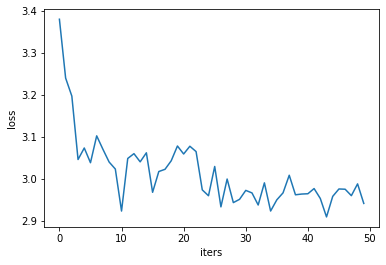

In [389]:
import matplotlib.pyplot as plt
plt.xlabel('iters')
plt.ylabel('loss')
plt.plot(all_losses)
plt.show()

#### Evaluation: A Sample of Generated Sequence

In [391]:
print(eval_step(net, predicted_len=30))

WGA<1Sr h B>  B?t Sts 3iBr hy I
